In [435]:
import matplotlib
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 5)) 

# 將字體換成SimHei
plt.rcParams['font.sans-serif'] = ['SimHei']

<Figure size 720x360 with 0 Axes>

In [436]:
import jieba
import jieba.analyse

jieba.set_dictionary("./dict.txt")
# 載入自定義詞庫：jieba.load_userdict(file_path)
# 加入字詞：jieba.add_word(word, freq=None, tag=None)
# 刪除字詞：jieba.del_word(word)

with open('./stopwords_zhTW.txt', encoding="utf-8") as f:
    stopword_list = [s for s in f.read().split('\n')]

In [437]:
def load_file(filename): #匯入檔案名
    file = '' 
    path = './uploads/' + filename
    with open(path,'r', encoding = 'utf-8') as load:
        file = load.readlines()
        load.close()
    return file

In [438]:
def pre_file(file):
    part = ''
    for i in range(len(file)):
        word_list = jieba.cut(file[i], cut_all=False)
        for word in word_list:
            if word not in stopword_list:
                part += word + " "
    return part

In [439]:
# 全文詞向量：文章主題＆網路爬蟲關鍵字(10)
def all_part(a_part):
    all_part = jieba.analyse.extract_tags(a_part, topK=10, withWeight=False, allowPOS=()) #topK為返回幾個TF / IDF權重最大的關鍵詞，默認值為20
    #print(all_part)
    #for x, w in jieba.analyse.extract_tags(a_part, topK=10, withWeight=True):
        #print('%s %s' % (x, w))
    return all_part

In [440]:
# 詞彙分佈圖
import matplotlib.pyplot as plt
import nltk, time

def img(all_part, filename):
    fig = plt.figure(figsize=(10, 5)) 
    load_path = "./uploads/" + filename
    raw = open(load_path, encoding = 'utf-8').read() 
    text1 = nltk.text.Text(jieba.cut(raw))
    graph1 = nltk.text.Text(text1)
    graph1.dispersion_plot(all_part)
    timestr = time.strftime("%Y%m%d-%H%M%S")
    path = './output/' + timestr + 'plot.png'
    if os.path.isfile(path):
        time.sleep(1)
        timestr = time.strftime("%Y%m%d-%H%M%S")
        path = './output/' + timestr + 'plot.png'
    fig.savefig(path)
    return path

In [441]:
# 詞彙多樣性：全文
def lexical_diversity(text):
    return len(set(text)) / len(text)

In [442]:
# 段落詞向量：文本對齊的關鍵字(3)
def part_(file):
    part = []
    for i in range(len(file)):
        s = file[i]
        epart = jieba.analyse.extract_tags(s, topK=3, withWeight=False, allowPOS=()) #topK為返回幾個TF / IDF權重最大的關鍵詞，默認值為20
        part.append(epart)
        #print(epart)
        #for x, w in jieba.analyse.extract_tags(s, topK=3, withWeight=True):
            #print('%s %s' % (x, w))
        #print()
    return part

In [443]:
def lcs(s1, s2, m, n):
    num = [[0 for i in range(n+1)] for j in range(m+1)]
    for i in range(1,m+1):
        for j in range(1, n+1):
            if s1[i-1] == s2[j-1]:
                num[i][j] = num[i-1][j-1]+1
            else:
                num[i][j] = max(num[i-1][j], num[i][j-1])
    return num[-1][-1]

In [444]:
def title_table(aj, ai, bi, story):
    key = "【關鍵字】：" + aj
    para = "【段落】：" + str(ai+1) + "→" + str(bi+1)
    t_list = [[key,para]]
    t_table = Table(t_list, colWidths=220, style=table_style_k1, spaceBefore=8,  spaceAfter=4)
    story.append(t_table)

In [445]:
def factorial(n):
    sum = 1
    for i in range(1, n + 1):
        sum *= i
    return sum

def degree_table(count, high_count, story, aList, bList):
    n_factorial = factorial(len(aList))
    nr_factorial = factorial(len(aList)-len(bList))
    sum_count = n_factorial/nr_factorial
    count_cal = round((count/sum_count),2)
    count_cal += (high_count*0.15)
    if count_cal < 0.33:
        degree = "【相似程度】：低"
    elif count_cal < 0.66:
        degree = "【相似程度】：中"
    else:
        degree = "【相似程度】：高"
    d_list = [[degree]]
    d_table = Table(d_list, colWidths=440, style=table_style_k2, spaceBefore=4,  spaceAfter=8)
    story.append(d_table)

In [454]:
import re, difflib, time
import editdistance
def analyze(partA, partB, story, file1, file2, p):
    for ai in range(len(partA)):
        for aj in partA[ai]:
            for bi in range(len(partB)):
                for bj in partB[bi]:
                    if aj == bj:
                        #print("【關鍵字】：", aj)
                        count = 0
                        high_count = 0
                        title_table(aj, ai, bi, story)
                        keyword1 = [['文本1', '文本2']]
                        keyword2 = [['相似度', 'LCS', '編輯距離']]
                        aList = re.split('，|。', str(file1[ai])) #文本1段落句_串列
                        bList = re.split('，|。', str(file2[bi])) #文本2段落句_串列
                        for s1 in aList: #抓出文本1段落句
                            if aj in s1: #符合關鍵字的段落
                                num1 = 0
                                num2 = 0
                                for s2 in bList: #抓出文本2段落句
                                    if aj in s2: #符合關鍵字的段落
                                        count += 1 #相似段落統計
                                        s1.strip()
                                        if len(s1) > 21:
                                            if num1 < 1:
                                                s1_list = list(s1)
                                                s1_list.insert(21, '\n')
                                                s1 = ''.join(s1_list)
                                                num1 += 1
                                        s2.strip()
                                        if len(s2) > 21:
                                            if num2 < 1:
                                                s2_list = list(s2)
                                                s2_list.insert(21, '\n')
                                                s2 = ''.join(s2_list)
                                                num2 += 1
    
                                        list1 = []
                                        list2 = []
                                        list1.append(s1)
                                        list1.append(s2)
                                        #print("%1s %-50s %1s %-50s" % ("A", s1, "B", s2))  # 相似段落
                                        diff_cal = difflib.SequenceMatcher(None, s1, s2).ratio() #diff_cal
                                        diff_cal = round(diff_cal,2)
                                        list2.append(diff_cal)
                                        #print("Diff: ", diff_cal)
                                        lcs_cal = lcs(s1, s2, len(s1), len(s2)) #lcs_cal
                                        list2.append(lcs_cal)
                                        #print("LCS: ", lcs_cal)
                                        editDistance = editdistance.eval(s1, s2)
                                        list2.append(editDistance)
                                        #print("Edit distance: ", editDistance) #editdistance
                                        #print()
                                        if diff_cal >= 0.5:
                                            keyword1.append(list1)
                                            content = Table(keyword1, colWidths=220, style=table_style_p1)
                                            story.append(content)

                                            keyword2.append(list2)
                                            number = Table(keyword2, colWidths=146.6, style=table_style_p2)
                                            story.append(number)
                                            high_count += 1
                                        else:
                                            keyword1.append(list1)
                                            content = Table(keyword1, colWidths=220, style=table_style_p11)
                                            story.append(content)

                                            keyword2.append(list2)
                                            number = Table(keyword2, colWidths=146.6, style=table_style_p12)
                                            story.append(number)
                                        keyword1 = []
                                        keyword2 = []
                        degree_table(count, high_count, story, aList, bList)
    timestr = time.strftime("%Y%m%d-%H%M%S")
    report_path = "./output/" + timestr + "Report.pdf"
    if os.path.isfile(report_path):
        time.sleep(1)
        timestr = time.strftime("%Y%m%d-%H%M%S")
        report_path = "./output/" + timestr + "Report.pdf" # 檔案名稱+時間
    doc = SimpleDocTemplate(report_path)
    doc.build(story)
    return report_path, timestr

In [447]:
import reportlab
import os
from reportlab.graphics.charts.lineplots import LinePlot
from reportlab.graphics.charts.piecharts import Pie
from reportlab.graphics.shapes import Drawing
from reportlab.lib import colors
from reportlab.lib.styles import ParagraphStyle
from reportlab.pdfbase import pdfmetrics
from reportlab.pdfbase.pdfmetrics import registerFontFamily
from reportlab.pdfbase.ttfonts import TTFont
from reportlab.platypus import Paragraph
from reportlab.platypus import SimpleDocTemplate, Paragraph, Table, Image
from reportlab.lib.styles import getSampleStyleSheet

home = os.path.expanduser("~")

pdfmetrics.registerFont(TTFont('MSJH', './fonts/MSJH.TTC'))
pdfmetrics.registerFont(TTFont('MSJHBD', './fonts/MSJHBD.TTC'))
registerFontFamily("MSJH", normal="MSJH", bold="MSJHBD")
FONT_NAME = "MSJH"

class MyCSS:
    h1 = ParagraphStyle(name="h1", fontName=FONT_NAME, fontSize=21, leading=28, alignment=1, spaceAfter=16)
    h3 = ParagraphStyle(name="h3", fontName=FONT_NAME, fontSize=14, leading=21, spaceBefore=16)
    h4 = ParagraphStyle(name="h4", fontName=FONT_NAME, fontSize=12, leading=21, spaceBefore=8)
    h5 = ParagraphStyle(name="h5", fontName=FONT_NAME, fontSize=12, leading=21, spaceBefore=12)
    p = ParagraphStyle(name="BodyText", fontName=FONT_NAME, fontSize=12, leading=18, spaceBefore=8, firstLineIndent=24)
    r = ParagraphStyle(name="BodyText", fontName=FONT_NAME, fontSize=12, leading=18, spaceBefore=8, firstLineIndent=24, textColor=colors.red)

class PiiPdf:
    @classmethod
    def doH1(cls, text: str):
        return Paragraph(text, MyCSS.h1)

    @classmethod
    def doH3(cls, text: str):
        return Paragraph(text, MyCSS.h3)
    
    @classmethod
    def doH4(cls, text: str):
        return Paragraph(text, MyCSS.h4)
    
    @classmethod
    def doH5(cls, text: str):
        return Paragraph(text, MyCSS.h5)

    @classmethod
    def doP(cls, text: str):
        return Paragraph(text, MyCSS.p)

from reportlab.platypus import TableStyle
table_style=TableStyle([
         ('FONT', (0, 0), (-1, -1), 'MSJH', 10),
         ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
         ('GRID', (0,0), (-1,-1), 0.5, colors.gray),
         ('INNERGRID', (0,0), (-1,-1), 0.25, colors.gray),
         ('BOX', (0,0), (-1,-1), 0.25, colors.gray),
         ('BACKGROUND',(0,0),(-1,0),colors.lavender),
         ('BACKGROUND',(0,-1),(-1,-1),colors.white)])
table_style_p11=TableStyle([
         ('FONT', (0, 0), (-1, -1), 'MSJH', 10),
         ('ALIGN', (0, 0), (-1, 0), 'CENTER'),
         ('ALIGN', (0, -1), (-1, -1), 'LEFT'),
         ('GRID', (0,0), (-1,-1), 0.5, colors.gray),
         ('INNERGRID', (0,0), (-1,-1), 0.25, colors.gray),
         ('BOX', (0,0), (-1,-1), 0.25, colors.gray),
         ('BACKGROUND',(0,0),(-1,0),colors.lavender),
         ('BACKGROUND',(0,-1),(-1,-1),colors.white)])
table_style_p12=TableStyle([
         ('FONT', (0, 0), (-1, -1), 'MSJH', 10),
         ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
         ('GRID', (0,0), (-1,-1), 0.5, colors.gray),
         ('INNERGRID', (0,0), (-1,-1), 0.25, colors.gray),
         ('BOX', (0,0), (-1,-1), 0.25, colors.gray),
         ('BACKGROUND',(0,0),(-1,0),colors.lavender),
         ('BACKGROUND',(0,-1),(-1,-1),colors.white)])
table_style_p1 = TableStyle([
         ('FONT', (0, 0), (-1, -1), 'MSJH', 10),
         ('ALIGN', (0, 0), (-1, 0), 'CENTER'),
         ('ALIGN', (0, -1), (-1, -1), 'LEFT'),
         ('GRID', (0,0), (-1,-1), 0.5, colors.gray),
         ('INNERGRID', (0,0), (-1,-1), 0.25, colors.gray),
         ('BOX', (0,0), (-1,-1), 0.25, colors.gray),
         ('BACKGROUND',(0,0),(-1,0),colors.lavender),
         ('BACKGROUND',(0,-1),(-1,-1),colors.lemonchiffon)])
table_style_p2 = TableStyle([
         ('FONT', (0, 0), (-1, -1), 'MSJH', 10),
         ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
         ('GRID', (0,0), (-1,-1), 0.5, colors.gray),
         ('INNERGRID', (0,0), (-1,-1), 0.25, colors.gray),
         ('BOX', (0,0), (-1,-1), 0.25, colors.gray),
         ('BACKGROUND',(0,0),(-1,0),colors.lavender),
         ('BACKGROUND',(0,-1),(-1,-1),colors.lemonchiffon)])
table_style_t = TableStyle([
         ('FONT', (0, 0), (-1, -1), 'MSJHBD', 10),
         ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
         ('GRID', (0,0), (-1,-1), 0.5, colors.gray),
         ('INNERGRID', (0,0), (-1,-1), 0.25, colors.gray),
         ('BOX', (0,0), (-1,-1), 0.25, colors.gray),
         ('BACKGROUND',(0,0),(-1,-1),colors.lavender)])
table_style_k1 = TableStyle([
         ('FONT', (0, 0), (-1, -1), 'MSJH', 11),
         ('ALIGN', (0, 0), (-1, -1), 'LEFT'),
         ('GRID', (0,0), (-1,-1), 0.5, colors.white),
         ('INNERGRID', (0,0), (-1,-1), 0.25, colors.white),
         ('BOX', (0,0), (-1,-1), 0.25, colors.white),
         ('BACKGROUND',(0,0),(-1,-1),colors.white)])
table_style_k2 = TableStyle([
         ('FONT', (0, 0), (-1, -1), 'MSJH', 10),
         ('ALIGN', (0, 0), (-1, -1), 'RIGHT'),
         ('GRID', (0,0), (-1,-1), 0.5, colors.white),
         ('INNERGRID', (0,0), (-1,-1), 0.25, colors.white),
         ('BOX', (0,0), (-1,-1), 0.25, colors.white),
         ('BACKGROUND',(0,0),(-1,-1),colors.white)])

In [448]:
# 移除段落空格 與 擷取標題
def pre_p(file):
    pre = []
    for i in file:
        if i != '\n':
            pre.append(i)
    title = pre[0]
    pre.remove(pre[0])
    return pre, title

In [449]:
def keyword_table(partA, partB):
    keywords = []
    empty = ['－', '－', '－']
    if len(partA) > len(partB):
        count_em = len(partA) - len(partB)
        for count in range(count_em):
            partB.append(empty)
    else:
        count_em = len(partB) - len(partA)
        for count in range(count_em):
            partA.append(empty)

    for i in range(len(partA)):
        keywords.append([partA[i], partB[i]])
    
    return keywords

In [450]:
def compared_report(filename1, filename2): # 時間
    p = PiiPdf()
    story = []
    story.append(p.doH1("<b>文本分析報告</b>"))
    
    f1 = load_file(filename1)
    story.append(p.doH3("<b>文本1</b>"))
    f1, f1_title = pre_p(f1)
    story.append(p.doH4("【標題】：" + f1_title + "　（段落＝" + str(len(f1)) + "）"))
    
    story.append(p.doH3("<b>全文關鍵字</b>"))
    a_part = pre_file(f1)
    allPart_1 = all_part(a_part)
    ten_part = [['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']]
    ten_part.append(allPart_1)
    t = Table(ten_part, colWidths=44, style=table_style, spaceBefore=4)
    story.append(t)
    
    story.append(p.doH3("<b>詞彙分布圖</b>"))
    path1 = img(allPart_1, filename1)
    photo1 = Image(path1, width=540, height=270)
    story.append(photo1)
    
    f2 = load_file(filename2)
    story.append(p.doH3("<b>文本2</b>"))
    f2, f2_title = pre_p(f2)
    story.append(p.doH4("【標題】：" + f2_title + "　（段落＝" + str(len(f2)) + "）"))
    
    story.append(p.doH3("<b>全文關鍵字</b>"))
    b_part = pre_file(f2)
    allPart_2 = all_part(b_part)
    ten_part = [['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']]
    ten_part.append(allPart_2)
    t = Table(ten_part, colWidths=44, style=table_style, spaceBefore=4)
    story.append(t)
    
    story.append(p.doH3("<b>詞彙分布圖</b>"))
    path2 = img(allPart_2, filename2)
    photo2 = Image(path2, width=540, height=270)
    story.append(photo2)
    
    story.append(p.doH3("<b>詞彙多樣性</b>"))
    score1 = lexical_diversity(a_part)
    score2 = lexical_diversity(b_part)
    score = [['文本1', '文本2']]
    score_ = [score1, score1]
    score.append(score_)
    score_F = Table(score, colWidths=220, style=table_style, spaceBefore=4)
    story.append(score_F)
    
    partA = part_(f1)
    partB = part_(f2)
    story.append(p.doH3("<b>段落關鍵字</b>"))
    key_ = [['文本1', '文本2']]
    key_title = Table(key_, colWidths=220, style=table_style_t, spaceBefore=4)
    story.append(key_title)
    keyword_ = [['KEY1','KEY2','KEY3','KEY4','KEY5','KEY6']]
    keywords = keyword_table(partA, partB)
    for key in keywords:
        keyword = key[0] + key[1]
        keyword_.append(keyword)
    key_content = Table(keyword_, colWidths=73.3, style=table_style)
    story.append(key_content)
                 
    story.append(p.doH3("<b>段落比對結果</b>"))
    report_path, timestr = analyze(partA, partB, story, f1, f2, p)
    return report_path, timestr, f1, f2

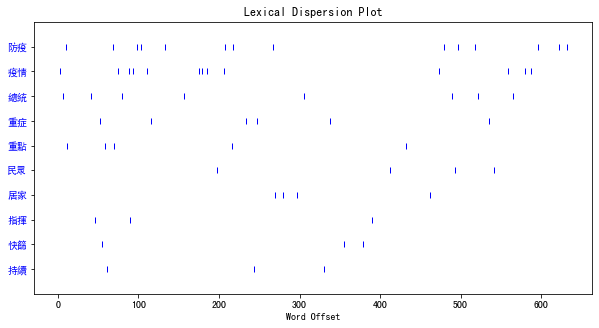

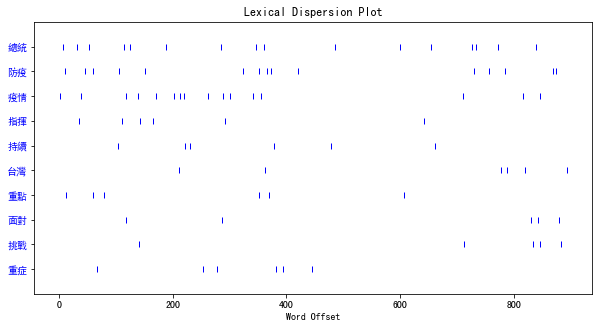

./output/20220707-234509Report.pdf


In [455]:
filename1 = 'TEXT1.txt'
filename2 = 'TEXT2.txt'
report_path, tstr, f1, f2 = compared_report(filename1, filename2)
print(report_path)